In [95]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

path = 'Salary_Data.csv'

df = pd.read_csv(path)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Data Cleaning

In [96]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [97]:
print(df.columns)
print(type(df.Salary[0]))
print(type(df['Years of Experience'][0]))

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
<class 'numpy.float64'>
<class 'numpy.float64'>


In [98]:
# Combining the education level Bachelor's degree and Bachelor's
df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")

df['Education Level'].value_counts()

Education Level
Bachelor's     3023
Master's       1861
PhD            1369
High School     448
Name: count, dtype: int64

Text(0, 0.5, 'Salary')

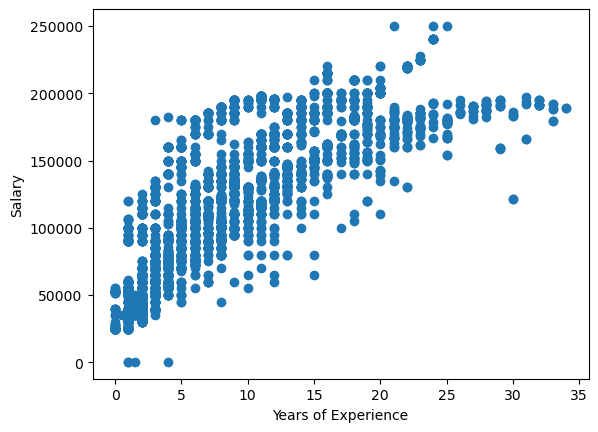

In [99]:
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/551786710.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Education Level')['Salary'].mean().plot(kind='bar')


<Axes: xlabel='Education Level'>

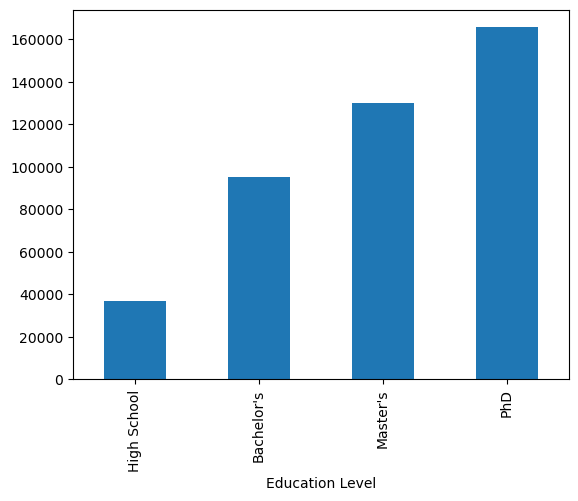

In [100]:
df['Education Level'] = pd.Categorical(df['Education Level'], categories=['High School', 'Bachelor\'s', 'Master\'s', 'PhD'], ordered=True)

df.groupby('Education Level')['Salary'].mean().plot(kind='bar')

In [101]:
# Job Title with the most data
df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 193, dtype: int64

In [102]:
# Remove Jobs with less than 10 data points
df = df.groupby('Job Title').filter(lambda x: len(x) > 100)
df['Job Title'].value_counts()

Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          309
Marketing Manager            255
Senior Software Engineer     244
Back end Developer           244
Front end Developer          241
Marketing Coordinator        158
Junior Sales Associate       142
Financial Manager            134
Marketing Analyst            132
Software Developer           125
Operations Manager           114
Human Resources Manager      104
Name: count, dtype: int64

# Prepare data

In [103]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [133]:
def calculate_inverse_scaled_salary_and_error(y_pred_unscaled, y_test, scaler_salary):
    # Reverse scale the true salaries for comparison
    y_test_unscaled = scaler_salary.inverse_transform(y_test[target_column].values.reshape(-1, 1)).flatten()
    # Compute absolute errors
    errors = np.abs(y_pred_unscaled - y_test_unscaled)
    avg_error = np.mean(errors)
    return avg_error

In [134]:
target_column = 'Salary'
features = df[df.columns.difference([target_column])].columns
df = df.dropna(subset=df.columns).copy()
df = df[df['Gender'] != 'Other']
df_prep= df.copy()

# Encode 'Education Level' for simplicity
education_mapping = {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3}
df_prep['Education Level'] = df_prep['Education Level'].map(lambda x: education_mapping.get(x, x)).copy()

gender_mapping = {'Male': 0, 'Female': 1}
df_prep['Gender'] = df_prep['Gender'].map(lambda x: gender_mapping.get(x, x)).copy()

encoder = LabelEncoder()
df_prep['Job Title'] = encoder.fit_transform(df_prep['Job Title'])

train, test = train_test_split(df_prep, test_size=0.4, stratify=df_prep['Gender'])
train, val = train_test_split(train, test_size=0.11,stratify=train['Gender'])

scaler_yoe = StandardScaler()
scaler_age = StandardScaler()
scaler_salary = StandardScaler()

# Fit scalers on corresponding features
train['Years of Experience'] = scaler_yoe.fit_transform(train[['Years of Experience']])
train['Age'] = scaler_age.fit_transform(train[['Age']])
train['Salary'] = scaler_salary.fit_transform(train[['Salary']])

# Transform validation and test sets
val['Years of Experience'] = scaler_yoe.transform(val[['Years of Experience']])
val['Age'] = scaler_age.transform(val[['Age']])
val['Salary'] = scaler_salary.transform(val[['Salary']])

test['Years of Experience'] = scaler_yoe.transform(test[['Years of Experience']])
test['Age'] = scaler_age.transform(test[['Age']])
test['Salary'] = scaler_salary.transform(test[['Salary']])

X_train = pd.DataFrame((train),columns = features)
y_train = pd.DataFrame((train),columns = [target_column])
X_val = pd.DataFrame((val),columns = features)
y_val = pd.DataFrame((val),columns = [target_column])
X_test = pd.DataFrame((test),columns = features)
y_test = pd.DataFrame((test),columns = [target_column])

In [135]:
X_train

,Age,Education Level,Gender,Job Title,Years of Experience
528,-0.905047,1,0,16,-0.748206
6374,-0.650598,1,1,3,-0.748206
3982,1.257771,3,0,2,1.029661
822,-0.523374,3,0,2,-0.263333
1581,2.530016,3,0,17,1.352910
...,...,...,...,...,...
3380,-0.523374,1,1,16,-0.586582
2794,1.130546,3,1,17,1.676159
2062,1.384995,3,0,13,1.191286
1854,0.621648,2,1,17,0.544788


# Training For Data Scientist Job not important for prediction

In [138]:
selected_features_all = ['Years of Experience', 'Education Level', 'Job Title']
model_all = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)
model_all.fit(X_train[selected_features_all], y_train[target_column])

y_pred = model_all.predict(X_test[selected_features_all])
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Inverse transform predictions back to original salary scale
y_pred_unscaled = scaler_salary.inverse_transform(y_pred.reshape(-1, 1)).flatten()

avg_error = calculate_inverse_scaled_salary_and_error(y_pred_unscaled, y_test, scaler_salary)
print(f"Average Error: {avg_error}")

Mean Squared Error: 0.17109566501129314
Average Error: 14946.43966558262


# Including Gender & Age

In [139]:
selected_features_all_gen = ['Years of Experience', 'Education Level', 'Age', 'Gender', 'Job Title']
model_all_gen = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)
model_all_gen.fit(X_train[selected_features_all_gen], y_train[target_column])

y_pred = model_all_gen.predict(X_test[selected_features_all_gen])
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Inverse transform predictions back to original salary scale
y_pred_unscaled = scaler_salary.inverse_transform(y_pred.reshape(-1, 1)).flatten()

avg_error = calculate_inverse_scaled_salary_and_error(y_pred_unscaled, y_test, scaler_salary)
print(f"Average Error: {avg_error}")

Mean Squared Error: 0.13106989262748125
Average Error: 13340.733408064512


Test loss 0.18

# Prepare Data For Software Engineer

In [147]:
software_engineer_code = encoder.transform(['Software Engineer'])[0]
df_job = df_prep[df_prep['Job Title'] == software_engineer_code].copy()


train, test = train_test_split(df_job, test_size=0.3, stratify=df_job['Gender'])
train, val = train_test_split(train, test_size=0.11, stratify=train['Gender'])

scaler_yoe = StandardScaler()
scaler_age = StandardScaler()
scaler_salary = StandardScaler()

# Fit scalers on corresponding features
train['Years of Experience'] = scaler_yoe.fit_transform(train[['Years of Experience']])
train['Age'] = scaler_age.fit_transform(train[['Age']])
train['Salary'] = scaler_salary.fit_transform(train[['Salary']])

# Transform validation and test sets
val['Years of Experience'] = scaler_yoe.transform(val[['Years of Experience']])
val['Age'] = scaler_age.transform(val[['Age']])
val['Salary'] = scaler_salary.transform(val[['Salary']])

test['Years of Experience'] = scaler_yoe.transform(test[['Years of Experience']])
test['Age'] = scaler_age.transform(test[['Age']])
test['Salary'] = scaler_salary.transform(test[['Salary']])

X_train = pd.DataFrame((train),columns = features)
y_train = pd.DataFrame((train),columns = [target_column])
X_val = pd.DataFrame((val),columns = features)
y_val = pd.DataFrame((val),columns = [target_column])
X_test = pd.DataFrame((test),columns = features)
y_test = pd.DataFrame((test),columns = [target_column])

In [148]:
df_job

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,1,16,5.0,90000.0
376,28.0,1,1,16,3.0,125000.0
380,29.0,1,1,16,4.0,140000.0
384,31.0,1,1,16,6.0,155000.0
388,29.0,1,1,16,4.0,140000.0
...,...,...,...,...,...,...
6191,27.0,0,1,16,3.0,80000.0
6205,27.0,0,1,16,3.0,80000.0
6219,27.0,0,1,16,3.0,80000.0
6233,27.0,0,1,16,3.0,80000.0


# Training For Software Engineer Job

In [150]:
selected_features_SE = ['Years of Experience', 'Education Level']
model_SE = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)
model_SE.fit(X_train[selected_features_SE], y_train[target_column])

y_pred = model_SE.predict(X_test[selected_features_SE])
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Inverse transform predictions back to original salary scale
y_pred_unscaled = scaler_salary.inverse_transform(y_pred.reshape(-1, 1)).flatten()

avg_error = calculate_inverse_scaled_salary_and_error(y_pred_unscaled, y_test, scaler_salary)
print(f"Average Error: {avg_error}")

Mean Squared Error: 0.3011804920780322
Average Error: 19743.43915843075


# Including Gender & Age

In [151]:
selected_features_SE_gen = ['Years of Experience', 'Education Level','Age','Gender']
model_SE_gen = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)
model_SE_gen.fit(X_train[selected_features_SE_gen], y_train[target_column])

y_pred = model_SE_gen.predict(X_test[selected_features_SE_gen])
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Inverse transform predictions back to original salary scale
y_pred_unscaled = scaler_salary.inverse_transform(y_pred.reshape(-1, 1)).flatten()

avg_error = calculate_inverse_scaled_salary_and_error(y_pred_unscaled, y_test, scaler_salary)
print(f"Average Error: {avg_error}")

Mean Squared Error: 0.0749130343080902
Average Error: 7555.353532618471


## Define Feature importance ALL JOBS

In [112]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
...,...,...,...,...,...,...
6682,28.0,Male,PhD,Marketing Manager,4.0,55000.0
6690,42.0,Male,Bachelor's,Financial Manager,13.0,130000.0
6691,36.0,Female,PhD,Marketing Manager,9.0,95000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0


/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/802055131.py:17: UserWarning: you are shuffling a 'Categorical' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_permuted.iloc[:, col].values)
/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/802055131.py:17: UserWarning: you are shuffling a 'Categorical' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_permuted.iloc[:, col].values)
/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/802055131.py:17: UserWarning: you are shuffling a 'Categorical' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor o

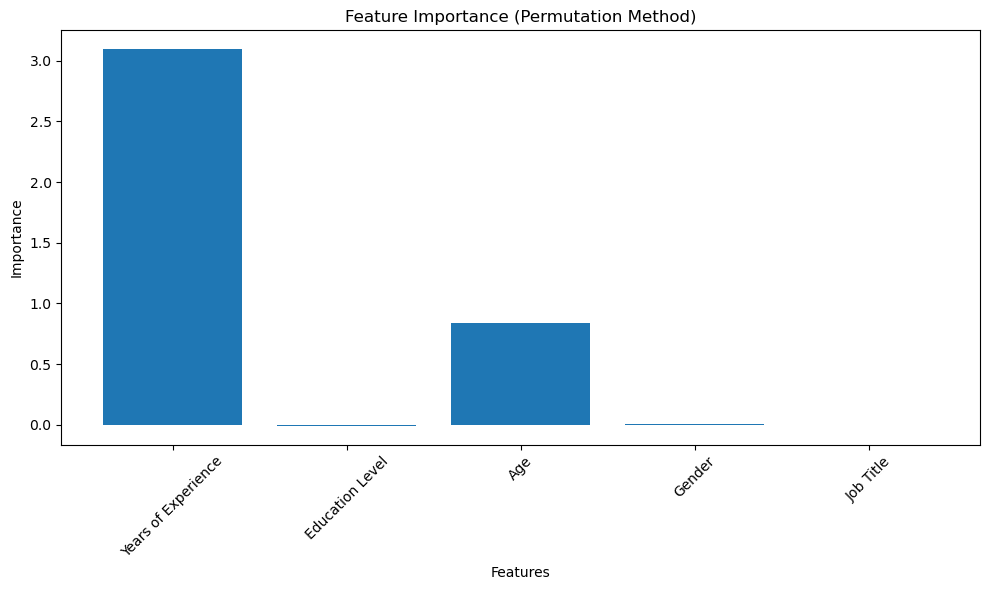

Years of Experience: 3.0936
Education Level: -0.0065
Age: 0.8419
Gender: 0.0119


In [113]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def permutation_importance(model, X, y, n_repeats=10):
    # Calculate the baseline mean squared error
    baseline_mse = mean_squared_error(y, model.predict(X))
    importances = []

    # Loop over each feature
    for col in range(X.shape[1]):
        feature_importances = []
        for _ in range(n_repeats):
            # Copy the data to avoid modifying the original dataset
            X_permuted = X.copy(deep=True)
            # Permute the values in the specific column
            np.random.shuffle(X_permuted.iloc[:, col].values)
            # Calculate the new MSE with the permuted column
            permuted_mse = mean_squared_error(y, model.predict(X_permuted))
            # The importance is the increase in MSE
            importance = permuted_mse - baseline_mse
            feature_importances.append(importance)
        # Average the importance over the repeats for stability
        importances.append(np.mean(feature_importances))

    return np.array(importances)

# Calculate permutation importance
importances = permutation_importance(model_all_gen, X_test[selected_features_all_gen], y_test.values.ravel())

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(selected_features_all_gen, importances)
plt.title('Feature Importance (Permutation Method)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print feature importances
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


It's important to note that these values represent the increase in the model's error when the feature is permuted. A larger increase in error indicates that the feature is more important for the model's predictions

/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/802055131.py:17: UserWarning: you are shuffling a 'Categorical' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_permuted.iloc[:, col].values)
/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/802055131.py:17: UserWarning: you are shuffling a 'Categorical' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_permuted.iloc[:, col].values)
/var/folders/v9/n514v4yd4hn8vqwrpj4cdt8c0000gn/T/ipykernel_24563/802055131.py:17: UserWarning: you are shuffling a 'Categorical' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor o

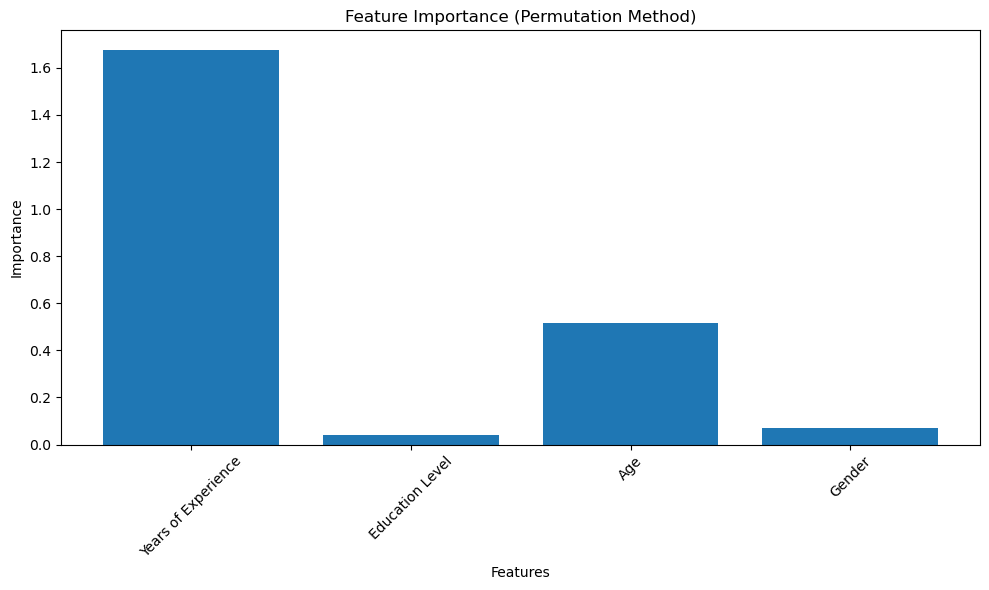

Years of Experience: 1.6754
Education Level: 0.0413
Age: 0.5180
Gender: 0.0715


In [114]:
# Calculate permutation importance
selected_features = ['Years of Experience', 'Education Level', 'Age', 'Gender']
feature_names = selected_features
importances = permutation_importance(model_SE_gen, X_test[selected_features], y_test.values.ravel())

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title('Feature Importance (Permutation Method)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print feature importances
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

# Fairness

In [152]:
# Separate the data by gender
salaries_men = df[df['Gender'] == 'Male']['Salary']
salaries_women = df[df['Gender'] == 'Female']['Salary']

# Calculate the mean salaries
mean_salary_men = salaries_men.mean()
mean_salary_women = salaries_women.mean()

mean_salary_men, mean_salary_women

(129414.41940532082, 119114.12423935092)

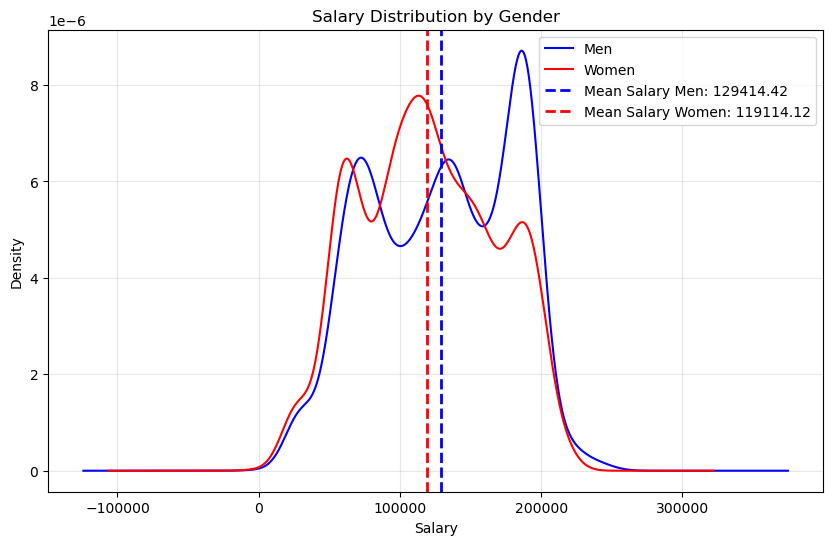

Difference in mean salary for all jobs: 10300.30


In [161]:
# Ensure Salary is numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Drop missing or invalid salaries
df = df.dropna(subset=['Salary'])

# Separate the data by gender
salaries_men = df[df['Gender'] == 'Male']['Salary']
salaries_women = df[df['Gender'] == 'Female']['Salary']

# Calculate the mean salaries
mean_salary_men = salaries_men.mean()
mean_salary_women = salaries_women.mean()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot density for men and women
salaries_men.plot(kind='density', label='Men', color='blue')
salaries_women.plot(kind='density', label='Women', color='red')

# Add vertical lines for the mean salaries
plt.axvline(mean_salary_men, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Salary Men: {mean_salary_men:.2f}')
plt.axvline(mean_salary_women, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary Women: {mean_salary_women:.2f}')

# Add plot titles and labels
plt.title('Salary Distribution by Gender')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)  # Optional: add gridlines for better readability
plt.show()

# Print the difference in mean salaries
print(f"Difference in mean salary for all jobs: {mean_salary_men - mean_salary_women:.2f}")


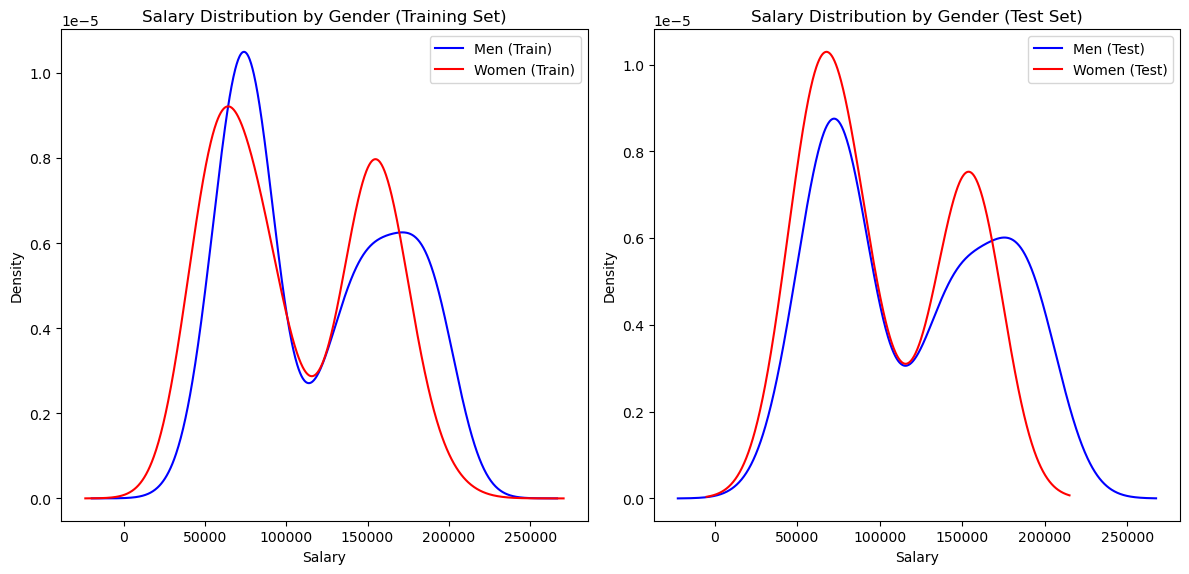

Difference in train mean salary for all jobs: 13057.67
Difference in test mean salary for all jobs: 17860.66


In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Inverse transform salaries back to the original scale using separate scaler for Salary
train_salaries = scaler_salary.inverse_transform(train[['Salary']].values).flatten()
test_salaries = scaler_salary.inverse_transform(test[['Salary']].values).flatten()

# Filter salaries by gender (0: Men, 1: Women)
train_salaries_men = train_salaries[train['Gender'] == 0]
train_salaries_women = train_salaries[train['Gender'] == 1]

test_salaries_men = test_salaries[test['Gender'] == 0]
test_salaries_women = test_salaries[test['Gender'] == 1]

# Plot the salary distributions for men and women in the training set
plt.figure(figsize=(12, 6))

# Training set distribution
plt.subplot(1, 2, 1)
plt.title('Salary Distribution by Gender (Training Set)')
plt.xlabel('Salary')
plt.ylabel('Density')
pd.Series(train_salaries_men).plot(kind='density', label='Men (Train)', color='blue')
pd.Series(train_salaries_women).plot(kind='density', label='Women (Train)', color='red')
plt.legend()

# Test set distribution
plt.subplot(1, 2, 2)
plt.title('Salary Distribution by Gender (Test Set)')
plt.xlabel('Salary')
plt.ylabel('Density')
pd.Series(test_salaries_men).plot(kind='density', label='Men (Test)', color='blue')
pd.Series(test_salaries_women).plot(kind='density', label='Women (Test)', color='red')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the mean salaries for men and women in the training set
mean_train_salary_men = train_salaries_men.mean()
mean_train_salary_women = train_salaries_women.mean()

# Calculate the mean salaries for men and women in the test set
mean_test_salary_men = test_salaries_men.mean()
mean_test_salary_women = test_salaries_women.mean()

# Print the differences in mean salaries
print(f"Difference in train mean salary for all jobs: {mean_train_salary_men - mean_train_salary_women:.2f}")
print(f"Difference in test mean salary for all jobs: {mean_test_salary_men - mean_test_salary_women:.2f}")


Preprocessing the data to not include Gender

In [163]:
# Predict salaries for men and women using the trained model
predictions = model_all_gen.predict(X_test[selected_features_all_gen])
predictions = pd.Series(predictions, index=test.index)

# Separate the predictions by gender
predictions_men = predictions[test['Gender'] == 0]
predictions_women = predictions[test['Gender'] == 1]

# Inverse transform the actual salaries for comparison
actual_salaries = scaler_salary.inverse_transform(test[['Salary']].values).flatten()

# Calculate mean absolute error for men
sum_error_all = 0
actual_salaries_men = actual_salaries[test['Gender'] == 0]

for pred, actual in zip(predictions_men, actual_salaries_men):
    sum_error_all += abs(pred - actual) / len(predictions_men)
print(f"Mean Predicted Salary for Men: {sum_error_all:.2f}")
mean_predicted_salary_men = sum_error_all

# Calculate mean absolute error for women
sum_error_all = 0
actual_salaries_women = actual_salaries[test['Gender'] == 1]

for pred, actual in zip(predictions_women, actual_salaries_women):
    sum_error_all += abs(pred - actual) / len(predictions_women)
print(f"Mean Predicted Salary for Women: {sum_error_all:.2f}")
mean_predicted_salary_women = sum_error_all

# Print the difference in mean salary prediction for all jobs
print(f"Difference in mean salary prediction for all jobs: {mean_predicted_salary_men - mean_predicted_salary_women:.2f}")


Mean Predicted Salary for Men: 120101.87
Mean Predicted Salary for Women: 102241.43
Difference in mean salary prediction for all jobs: 17860.44


In [164]:
# Predict salaries for men and women using the trained model
predictions = model_all.predict(X_test[selected_features_all])
predictions = pd.Series(predictions, index=test.index)

# Separate the predictions by gender
predictions_men = predictions[test['Gender'] == 0]
predictions_women = predictions[test['Gender'] == 1]

# Inverse transform the actual salaries for comparison
actual_salaries = scaler_salary.inverse_transform(test[['Salary']].values).flatten()

# Calculate mean absolute error for men
sum_error_all = 0
actual_salaries_men = actual_salaries[test['Gender'] == 0]

for pred, actual in zip(predictions_men, actual_salaries_men):
    sum_error_all += abs(pred - actual) / len(predictions_men)
print(f"Mean Predicted Salary for Men: {sum_error_all:.2f}")
mean_predicted_salary_men = sum_error_all

# Calculate mean absolute error for women
sum_error_all = 0
actual_salaries_women = actual_salaries[test['Gender'] == 1]

for pred, actual in zip(predictions_women, actual_salaries_women):
    sum_error_all += abs(pred - actual) / len(predictions_women)
print(f"Mean Predicted Salary for Women: {sum_error_all:.2f}")
mean_predicted_salary_women = sum_error_all

# Print the difference in mean salary prediction for all jobs
print(f"Difference in mean salary prediction for all jobs: {mean_predicted_salary_men - mean_predicted_salary_women:.2f}")


Mean Predicted Salary for Men: 120101.91
Mean Predicted Salary for Women: 102241.57
Difference in mean salary prediction for all jobs: 17860.33


# Is Uni worth it? For Software Engeneer

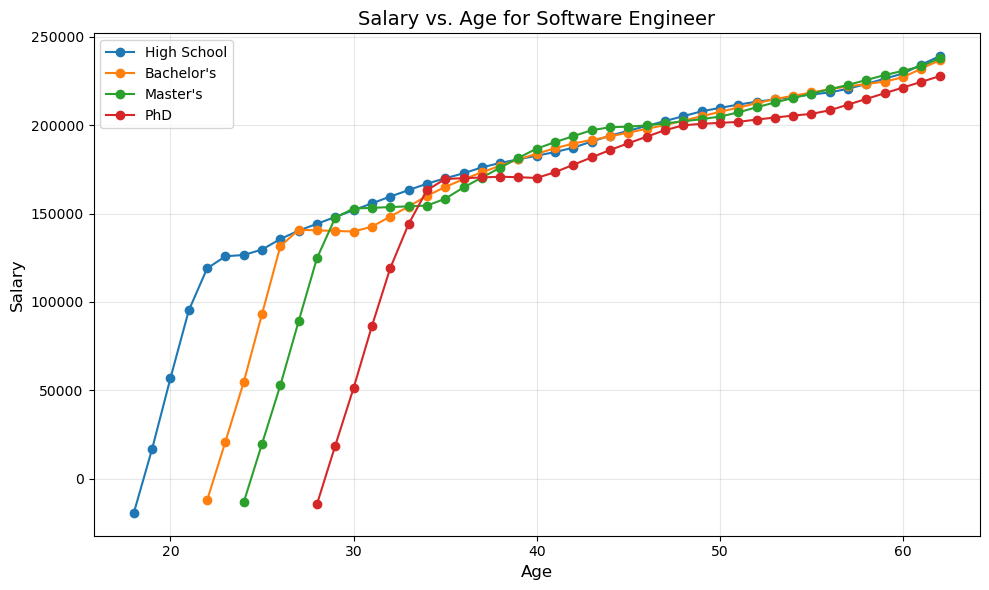

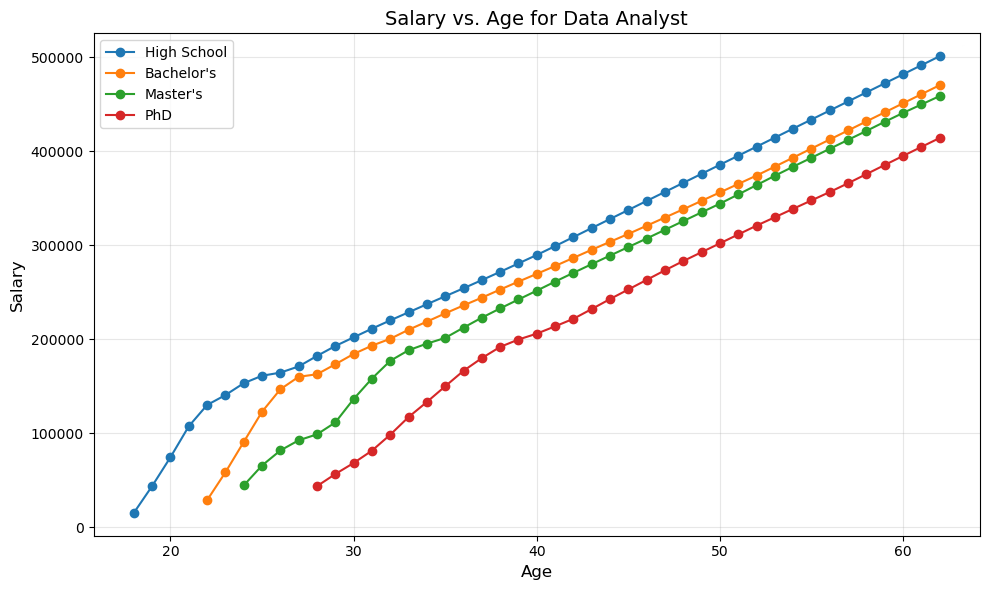

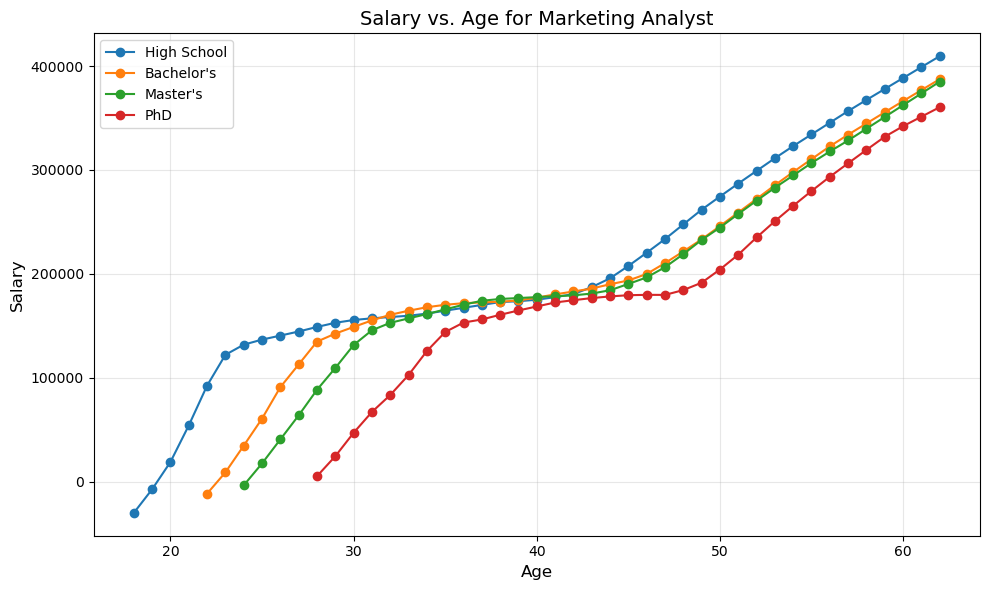

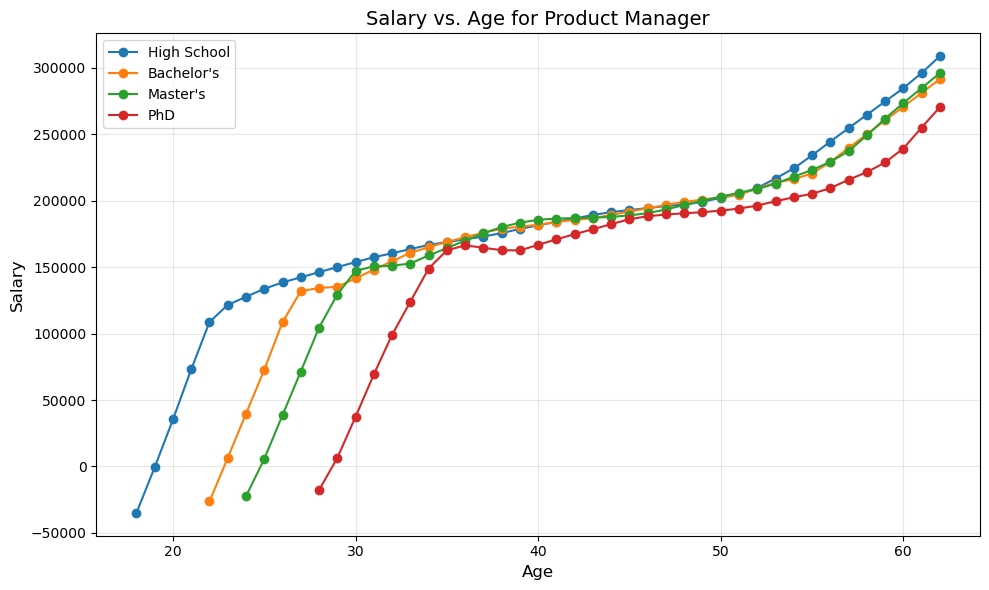

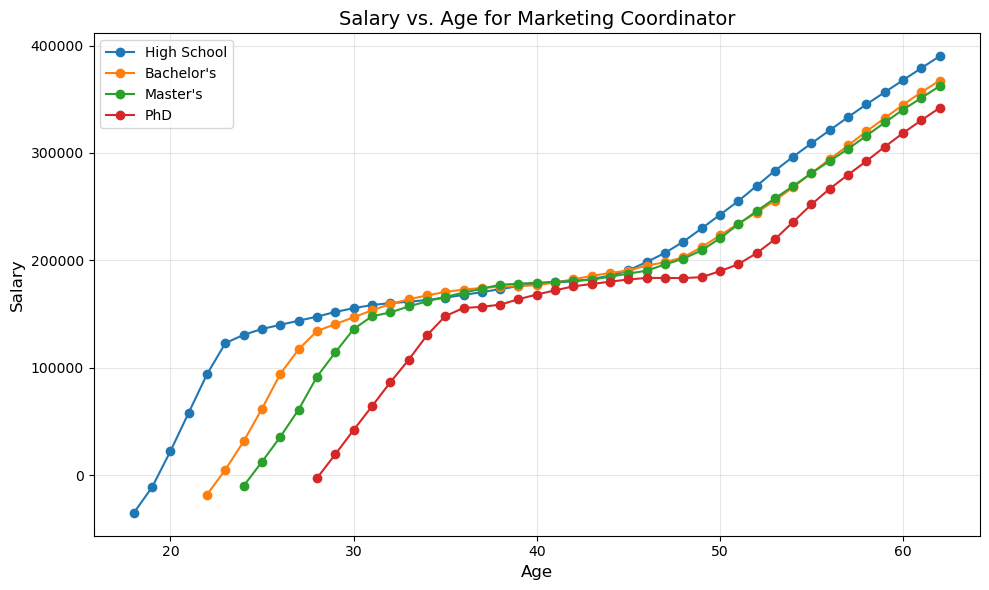

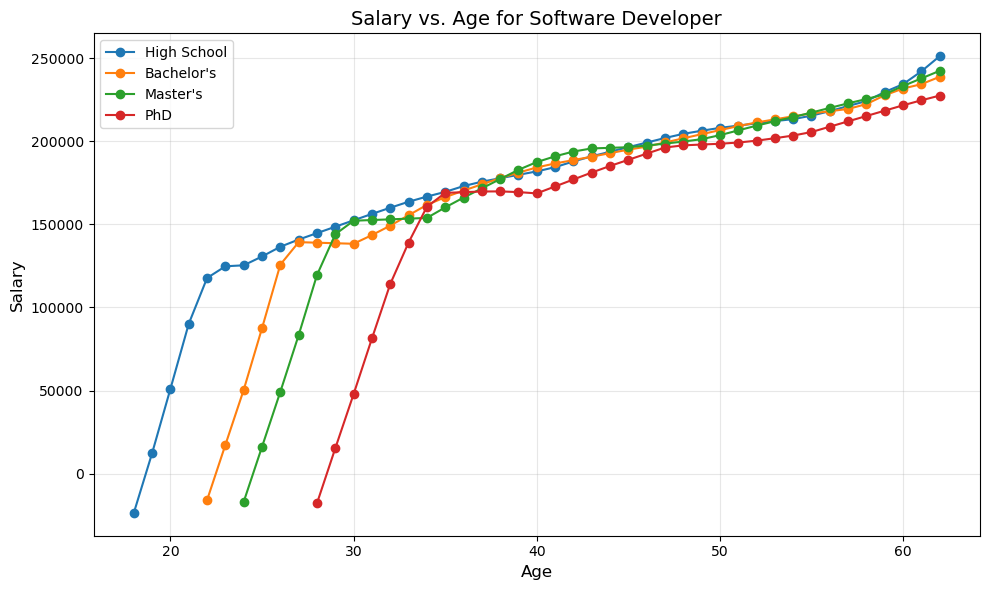

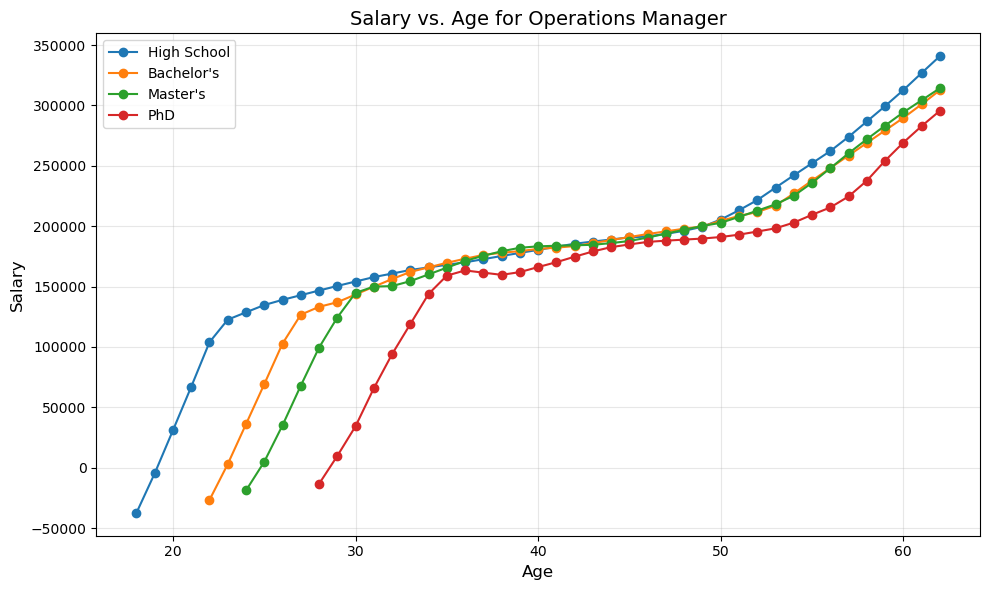

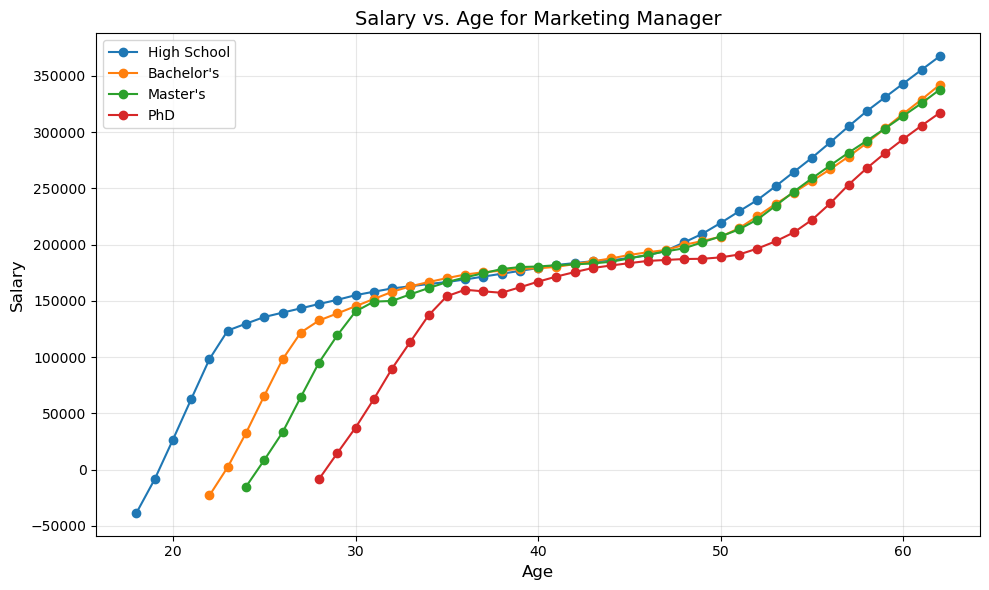

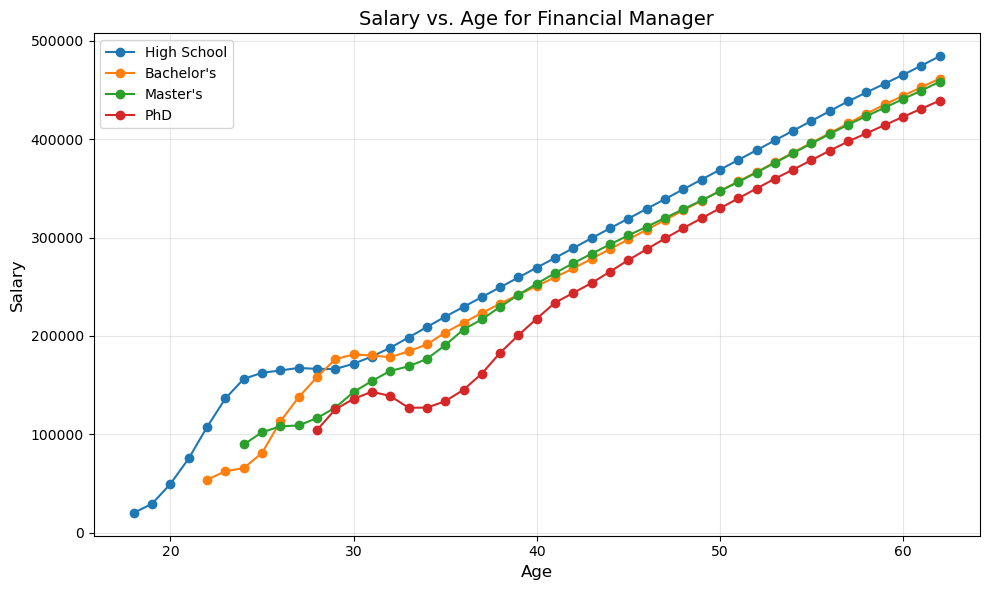

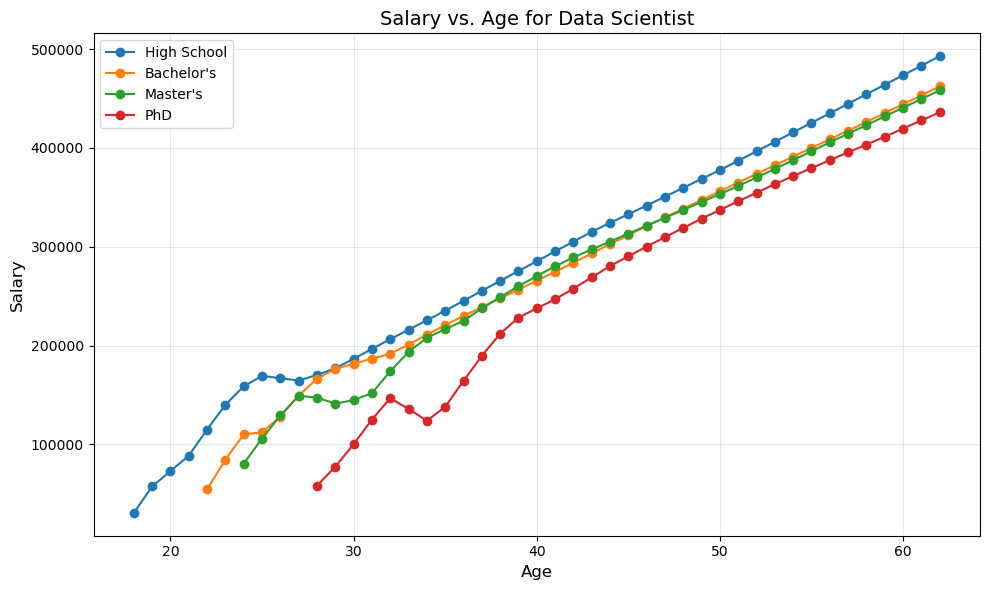

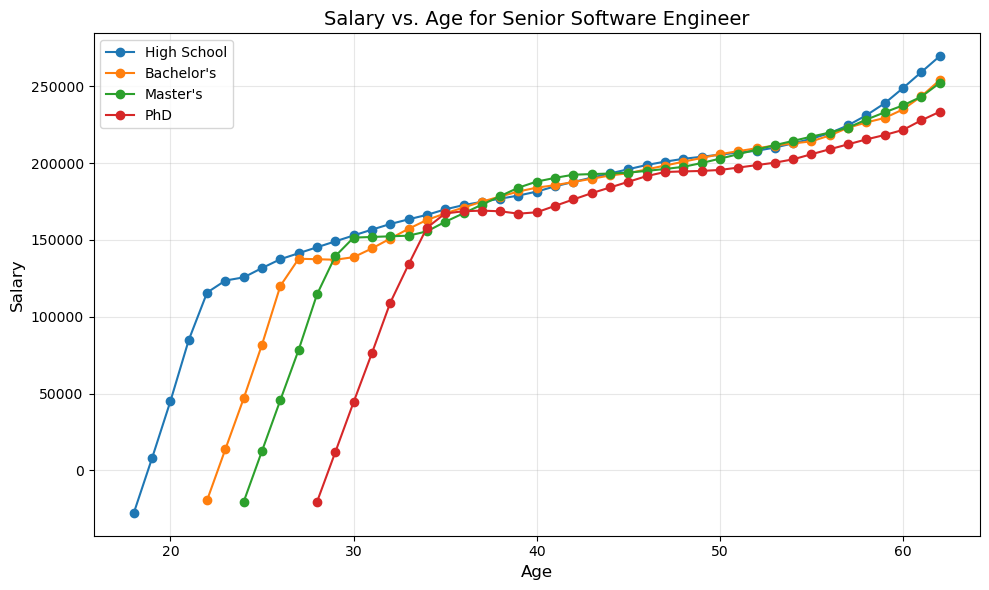

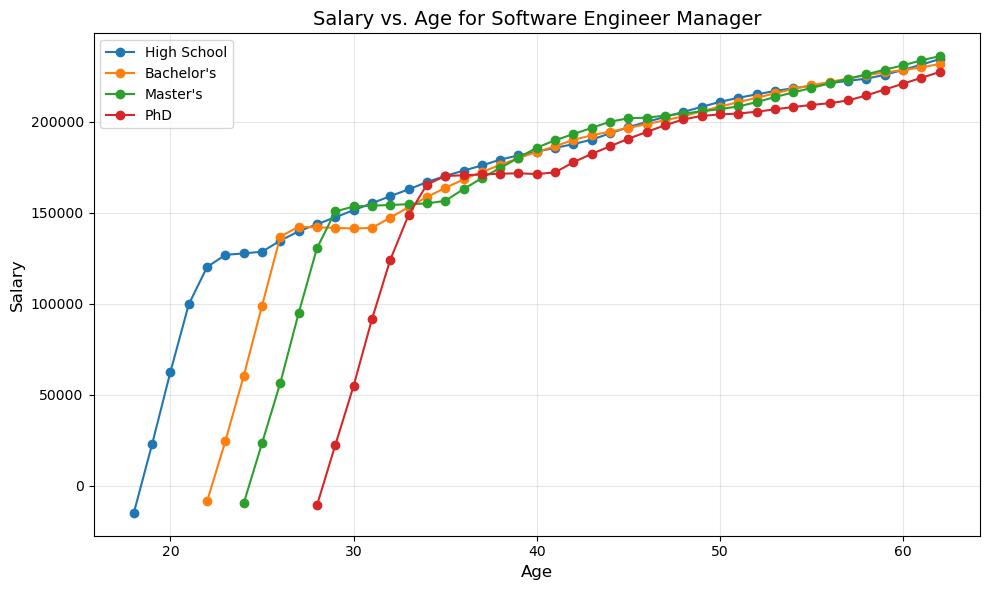

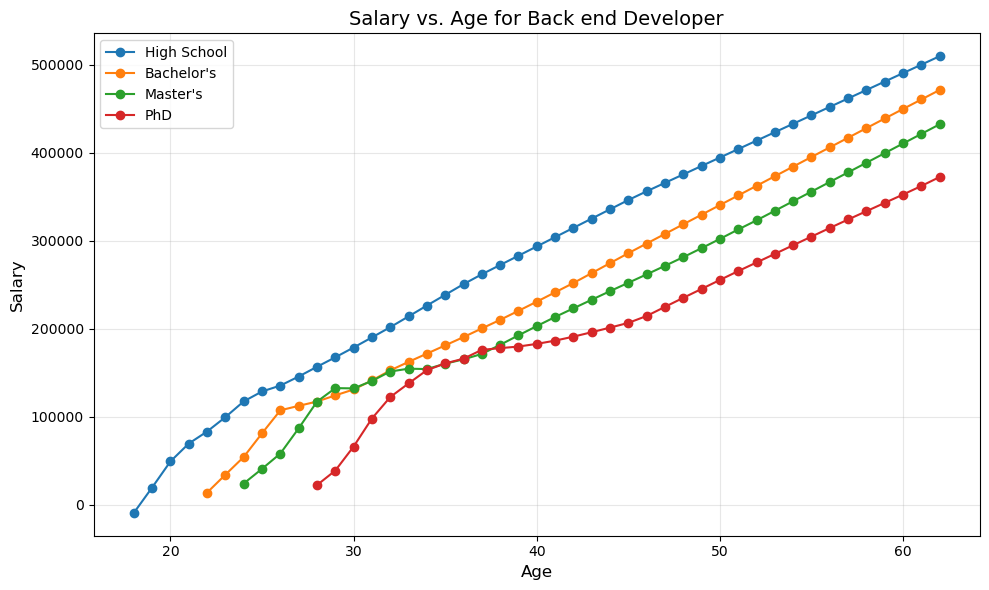

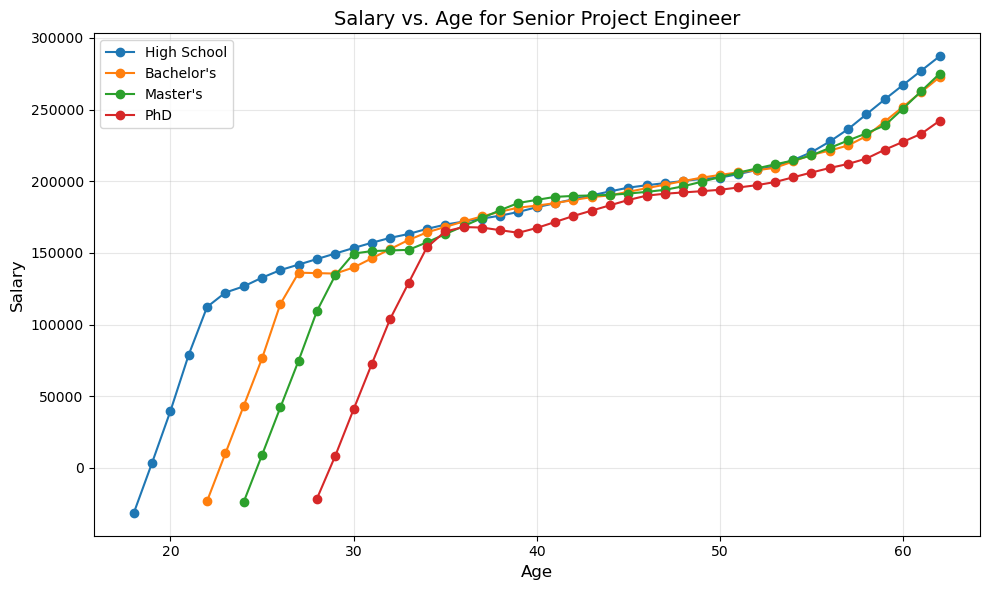

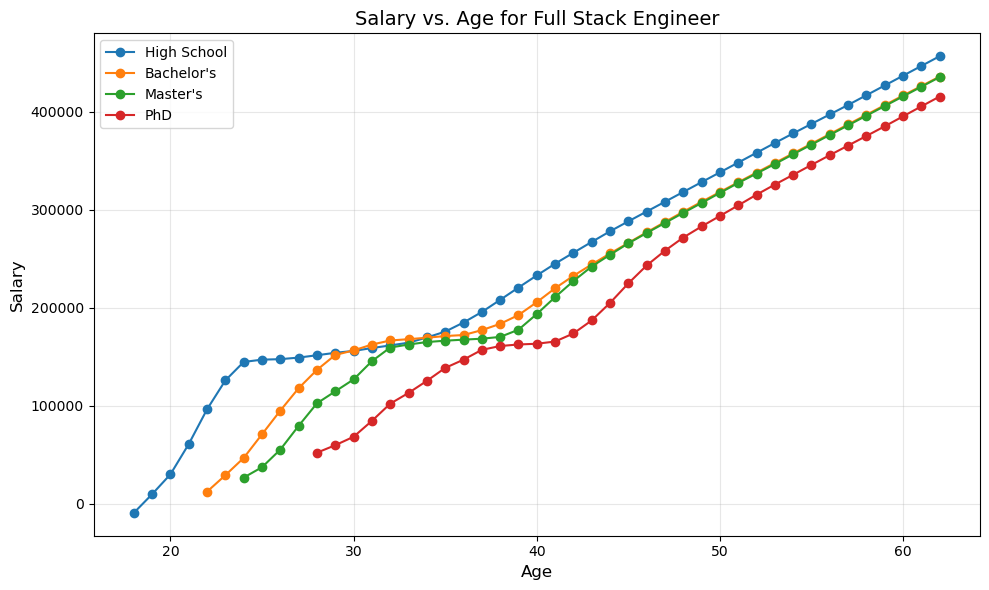

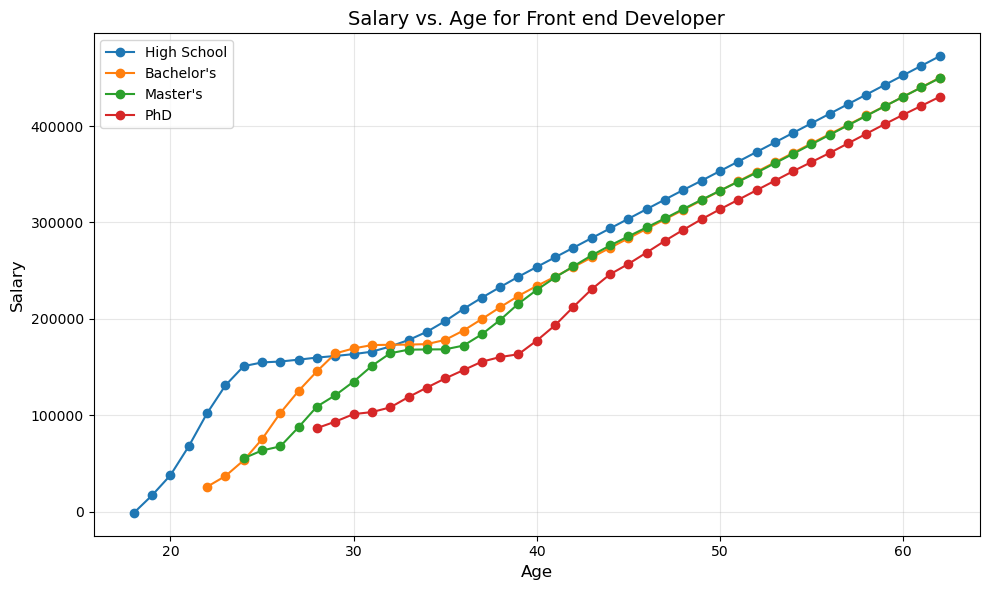

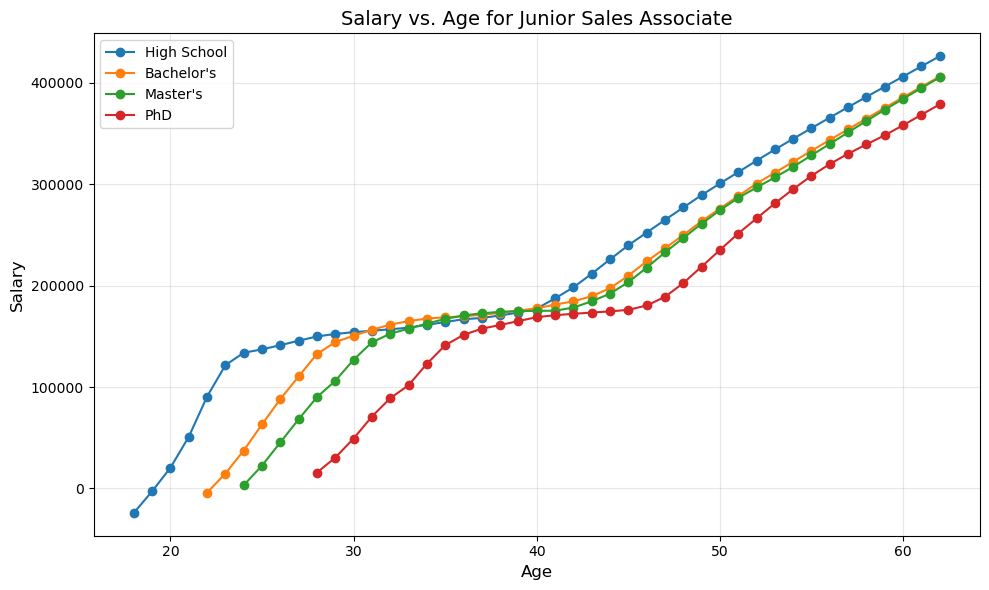

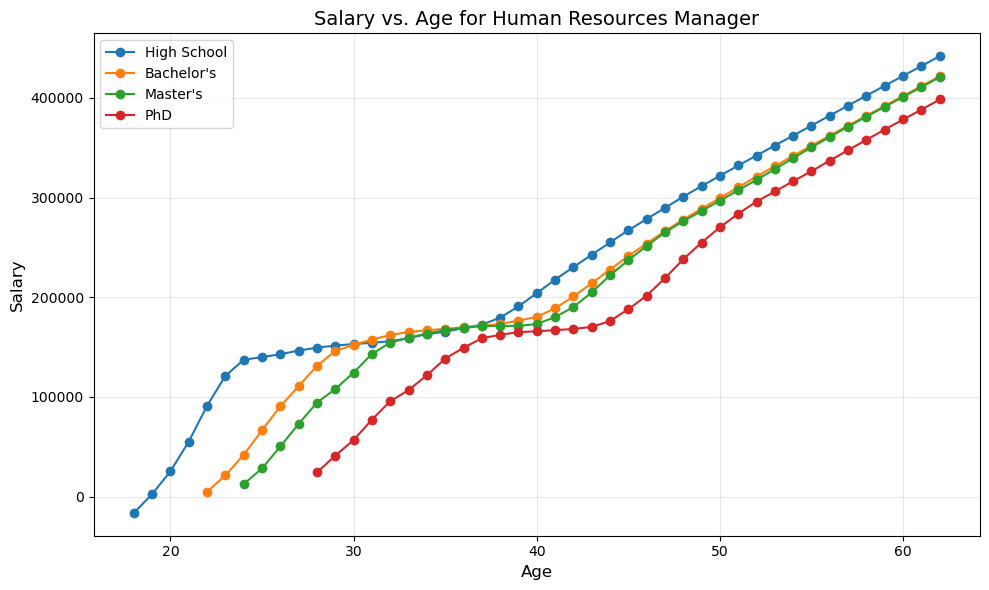

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Define job titles and their encoded labels
job_titles = df['Job Title'].unique()
job_titles_labels = encoder.transform(job_titles)

# Define education levels and their labels
education_levels = [0, 1, 2, 3]  # 0: High School, 1: Bachelor's, 2: Master's, 3: PhD
education_labels = ["High School", "Bachelor's", "Master's", "PhD"]

# Define the starting ages for each education level
starting_ages = {
    0: 18,  # High School
    1: 22,  # Bachelor's
    2: 24,  # Master's
    3: 28   # PhD
}

# Maximum years of experience (e.g., 40)
max_years_of_experience = 44

# Iterate through each job title to create individual plots
for job_title, label in zip(job_titles, job_titles_labels):
    plt.figure(figsize=(10, 6))

    # Iterate through each education level
    for edu_level, edu_label in zip(education_levels, education_labels):
        # Generate Years of Experience adjusted for the starting age of this education level
        years_of_experience = np.arange(0, max_years_of_experience - (starting_ages[edu_level] - 18) + 1, 1).reshape(-1, 1)
        ages = years_of_experience + starting_ages[edu_level]
    
        # Convert to DataFrame with column name for scaler
        years_of_experience_df = pd.DataFrame(years_of_experience, columns=["Years of Experience"])
    
        # Scale Years of Experience using its specific scaler
        scaled_years_of_experience = scaler_yoe.transform(years_of_experience_df)
    
        # Create a DataFrame for the current job title and education level
        scenarios_df = pd.DataFrame({
            "Years of Experience": scaled_years_of_experience.flatten(),
            "Education Level": [edu_level] * len(scaled_years_of_experience),
            "Job Title": [label] * len(scaled_years_of_experience)
        })
    
        # Predict scaled salaries using the trained model
        scenarios_df["Predicted Scaled Salary"] = model_all.predict(scenarios_df)
    
        # Reverse the scaling on Predicted Salary to get the original salary values
        scenarios_df["Predicted Salary"] = scaler_salary.inverse_transform(
            scenarios_df[["Predicted Scaled Salary"]]
        ).flatten()
    
        # Plot the results with the Age axis
        plt.plot(
            ages,
            scenarios_df["Predicted Salary"],
            marker='o',
            label=f'{edu_label}'
        )


    # Add titles, labels, and legend for the current job title
    plt.title(f'Salary vs. Age for {job_title}', fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Salary', fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()

    # Save the plot to a file (optional)
    # plt.savefig(f'salary_vs_age_{job_title}.png', bbox_inches='tight')

    # Show the plot
    plt.show()

In [184]:
selected_features_all_nojob = ['Years of Experience', 'Education Level']
model_all_nojob = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)
model_all_nojob.fit(X_train[selected_features_all_nojob], y_train[target_column])

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)

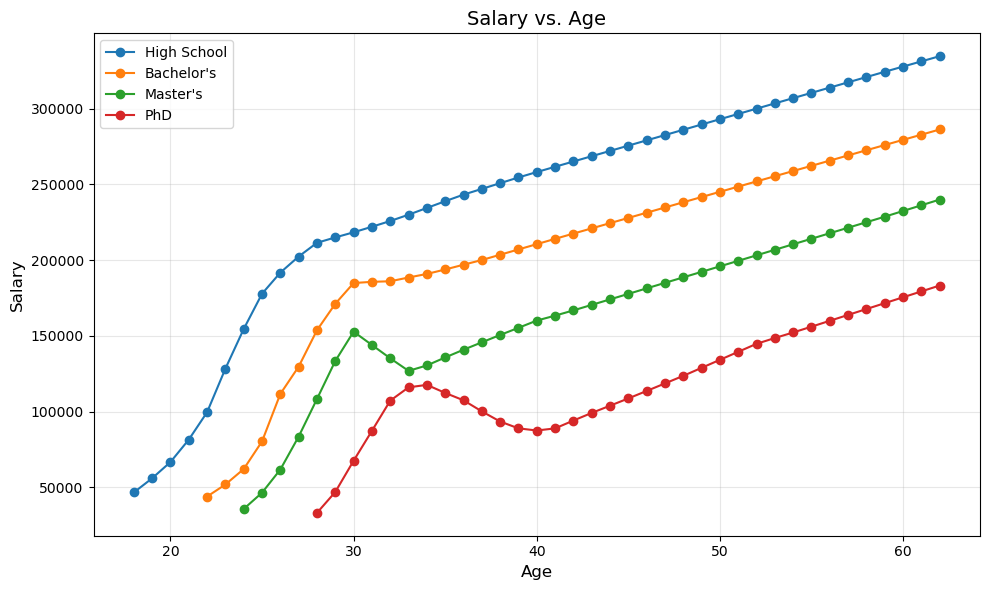

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Define education levels and their labels
education_levels = [0, 1, 2, 3]  # 0: High School, 1: Bachelor's, 2: Master's, 3: PhD
education_labels = ["High School", "Bachelor's", "Master's", "PhD"]

# Define the starting ages for each education level
starting_ages = {
    0: 18,  # High School
    1: 22,  # Bachelor's
    2: 24,  # Master's
    3: 28   # PhD
}

# Maximum years of experience (e.g., 40)
max_years_of_experience = 44

plt.figure(figsize=(10, 6))

# Iterate through each education level
for edu_level, edu_label in zip(education_levels, education_labels):
    # Generate Years of Experience adjusted for the starting age of this education level
    years_of_experience = np.arange(0, max_years_of_experience - (starting_ages[edu_level] - 18) + 1, 1).reshape(-1, 1)
    ages = years_of_experience + starting_ages[edu_level]

    # Convert to DataFrame with column name for scaler
    years_of_experience_df = pd.DataFrame(years_of_experience, columns=["Years of Experience"])

    # Scale Years of Experience using its specific scaler
    scaled_years_of_experience = scaler_yoe.transform(years_of_experience_df)

    # Create a DataFrame for the current job title and education level
    scenarios_df = pd.DataFrame({
        "Years of Experience": scaled_years_of_experience.flatten(),
        "Education Level": [edu_level] * len(scaled_years_of_experience)
    })

    # Predict scaled salaries using the trained model
    scenarios_df["Predicted Scaled Salary"] = model_all_nojob.predict(scenarios_df)

    # Reverse the scaling on Predicted Salary to get the original salary values
    scenarios_df["Predicted Salary"] = scaler_salary.inverse_transform(
        scenarios_df[["Predicted Scaled Salary"]]
    ).flatten()

    # Plot the results with the Age axis
    plt.plot(
        ages,
        scenarios_df["Predicted Salary"],
        marker='o',
        label=f'{edu_label}'
    )


# Add titles, labels, and legend for the current job title
plt.title(f'Salary vs. Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()

# Save the plot to a file (optional)
# plt.savefig(f'salary_vs_age_{job_title}.png', bbox_inches='tight')

# Show the plot
plt.show()

TypeError: calculate_inverse_scaled_salary_and_error() missing 2 required positional arguments: 'test_data' and 'scaler'